In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  3648 non-null   int64  
 1   Unnamed: 0    3648 non-null   object 
 2   Australia     3648 non-null   float64
 3   Europe        3648 non-null   float64
 4   Brazil        3648 non-null   float64
 5   Canada        3648 non-null   float64
 6   China         3648 non-null   float64
 7   Denmark       3648 non-null   float64
 8   Hong Kong     3648 non-null   float64
 9   India         3648 non-null   float64
 10  Japan         3648 non-null   float64
 11  Malaysia      3648 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 342.1+ KB


In [4]:
data.head(20)

,Unnamed: 0.1,Unnamed: 0,Australia,Europe,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Malaysia
0,0,2010-01-04,0.9133,1.4419,1.7200,1.0377,6.8273,5.1597,7.7555,46.27,92.55,3.3960
1,1,2010-01-05,0.9143,1.4402,1.7296,1.0371,6.8258,5.1668,7.7564,46.13,91.48,3.3850
2,2,2010-01-06,0.9189,1.4404,1.7292,1.0333,6.8272,5.1638,7.7546,45.72,92.53,3.3790
3,3,2010-01-07,0.9168,1.4314,1.7409,1.0351,6.8280,5.1981,7.7539,45.67,93.31,3.3680
4,4,2010-01-08,0.9218,1.4357,1.7342,1.0345,6.8274,5.1827,7.7553,45.50,92.70,3.3750
5,5,2010-01-09,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.0000
6,6,2010-01-10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.0000
7,7,2010-01-11,0.9295,1.4536,1.7330,1.0317,6.8263,5.1185,7.7550,45.35,91.90,3.3350
8,8,2010-01-12,0.9242,1.4523,1.7407,1.0374,6.8267,5.1232,7.7552,45.60,90.95,3.3425
9,9,2010-01-13,0.9225,1.4492,1.7480,1.0319,6.8295,5.1336,7.7564,45.47,91.38,3.3445


In [5]:
data.drop("Unnamed: 0.1", inplace = True, axis = 1)
data.columns

Index(['Unnamed: 0', 'Australia', 'Europe', 'Brazil', 'Canada', 'China',
       'Denmark', 'Hong Kong', 'India', 'Japan', 'Malaysia'],
      dtype='object')

In [6]:
data.tail(1)

,Unnamed: 0,Australia,Europe,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Malaysia
3647,2019-12-31,0.703,1.1227,4.019,1.2962,6.9618,6.6554,7.7894,71.36,108.67,4.0918


In [7]:
data.columns = [
    "Date",
    "Australia",
    "Europe",
    "Brazil",
    "Canada",
    "China",
    "Denmark",
    "Hong Kong",
    "India",
    "Japan",
    "Malaysia"
]

idx = pd.date_range("2010-01-04", "2019-12-31")
data["Date"] = pd.to_datetime(data["Date"])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3648 non-null   datetime64[ns]
 1   Australia  3648 non-null   float64       
 2   Europe     3648 non-null   float64       
 3   Brazil     3648 non-null   float64       
 4   Canada     3648 non-null   float64       
 5   China      3648 non-null   float64       
 6   Denmark    3648 non-null   float64       
 7   Hong Kong  3648 non-null   float64       
 8   India      3648 non-null   float64       
 9   Japan      3648 non-null   float64       
 10  Malaysia   3648 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 313.6 KB


In [8]:
data.set_index("Date", inplace = True)

data = data.reindex(idx, fill_value=0)

data.replace(0, np.nan, inplace=True)

data

,Australia,Europe,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Malaysia
2010-01-04,0.9133,1.4419,1.7200,1.0377,6.8273,5.1597,7.7555,46.27,92.55,3.3960
2010-01-05,0.9143,1.4402,1.7296,1.0371,6.8258,5.1668,7.7564,46.13,91.48,3.3850
2010-01-06,0.9189,1.4404,1.7292,1.0333,6.8272,5.1638,7.7546,45.72,92.53,3.3790
2010-01-07,0.9168,1.4314,1.7409,1.0351,6.8280,5.1981,7.7539,45.67,93.31,3.3680
2010-01-08,0.9218,1.4357,1.7342,1.0345,6.8274,5.1827,7.7553,45.50,92.70,3.3750
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.6978,1.1174,4.0507,1.3073,6.9954,6.6829,7.7874,71.45,109.47,4.1260
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30,0.7004,1.1217,4.0152,1.3058,6.9864,6.6589,7.7857,71.30,108.85,4.1053


In [9]:
data.interpolate(method="linear",limit_direction="forward", inplace = True)

data

,Australia,Europe,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Malaysia
2010-01-04,0.913300,1.441900,1.720000,1.0377,6.8273,5.1597,7.755500,46.27,92.550000,3.3960
2010-01-05,0.914300,1.440200,1.729600,1.0371,6.8258,5.1668,7.756400,46.13,91.480000,3.3850
2010-01-06,0.918900,1.440400,1.729200,1.0333,6.8272,5.1638,7.754600,45.72,92.530000,3.3790
2010-01-07,0.916800,1.431400,1.740900,1.0351,6.8280,5.1981,7.753900,45.67,93.310000,3.3680
2010-01-08,0.921800,1.435700,1.734200,1.0345,6.8274,5.1827,7.755300,45.50,92.700000,3.3750
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.697800,1.117400,4.050700,1.3073,6.9954,6.6829,7.787400,71.45,109.470000,4.1260
2019-12-28,0.698667,1.118833,4.038867,1.3068,6.9924,6.6749,7.786833,71.40,109.263333,4.1191
2019-12-29,0.699533,1.120267,4.027033,1.3063,6.9894,6.6669,7.786267,71.35,109.056667,4.1122
2019-12-30,0.700400,1.121700,4.015200,1.3058,6.9864,6.6589,7.785700,71.30,108.850000,4.1053


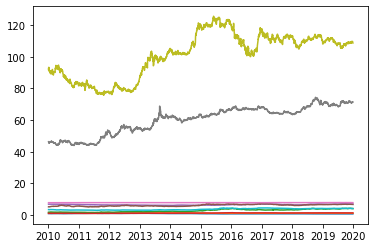

In [10]:
for i in data.columns:
    plt.plot(data[i])
plt.show()

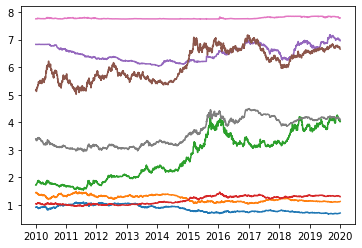

In [11]:
ignore_cols = ["India", "Japan"]
for i in data.columns:
    if i not in ignore_cols:
        plt.plot(data[i])
plt.show()

In [23]:
d_norm = pd.DataFrame([])

sclr = MinMaxScaler(feature_range=(0, 1))
d_norm = sclr.fit_transform(data)

In [24]:
d_norm = pd.DataFrame(d_norm)

In [26]:
d_norm.columns = data.columns

In [27]:
d_norm

,Australia,Europe,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Malaysia
0,0.562616,0.898667,0.067049,0.180599,0.691409,0.068305,0.061630,0.077884,0.337545,0.294419
1,0.564926,0.894889,0.070576,0.179432,0.690091,0.071604,0.070577,0.073283,0.316085,0.287364
2,0.575555,0.895333,0.070429,0.172045,0.691321,0.070210,0.052684,0.059809,0.337144,0.283515
3,0.570702,0.875333,0.074727,0.175544,0.692024,0.086148,0.045726,0.058166,0.352788,0.276459
4,0.582255,0.884889,0.072266,0.174378,0.691497,0.078993,0.059642,0.052580,0.340554,0.280949
...,...,...,...,...,...,...,...,...,...,...
3644,0.064695,0.177556,0.923326,0.704705,0.839072,0.776079,0.378728,0.905357,0.676895,0.762668
3645,0.066697,0.180741,0.918978,0.703733,0.836437,0.772362,0.373095,0.903713,0.672750,0.758242
3646,0.068700,0.183926,0.914631,0.702760,0.833802,0.768645,0.367462,0.902070,0.668605,0.753817
3647,0.070702,0.187111,0.910283,0.701788,0.831167,0.764927,0.361829,0.900427,0.664460,0.749391


In [34]:
d_norm.set_index(idx, inplace=True)
d_norm


,Australia,Europe,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Malaysia
2010-01-04,0.562616,0.898667,0.067049,0.180599,0.691409,0.068305,0.061630,0.077884,0.337545,0.294419
2010-01-05,0.564926,0.894889,0.070576,0.179432,0.690091,0.071604,0.070577,0.073283,0.316085,0.287364
2010-01-06,0.575555,0.895333,0.070429,0.172045,0.691321,0.070210,0.052684,0.059809,0.337144,0.283515
2010-01-07,0.570702,0.875333,0.074727,0.175544,0.692024,0.086148,0.045726,0.058166,0.352788,0.276459
2010-01-08,0.582255,0.884889,0.072266,0.174378,0.691497,0.078993,0.059642,0.052580,0.340554,0.280949
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.064695,0.177556,0.923326,0.704705,0.839072,0.776079,0.378728,0.905357,0.676895,0.762668
2019-12-28,0.066697,0.180741,0.918978,0.703733,0.836437,0.772362,0.373095,0.903713,0.672750,0.758242
2019-12-29,0.068700,0.183926,0.914631,0.702760,0.833802,0.768645,0.367462,0.902070,0.668605,0.753817
2019-12-30,0.070702,0.187111,0.910283,0.701788,0.831167,0.764927,0.361829,0.900427,0.664460,0.749391


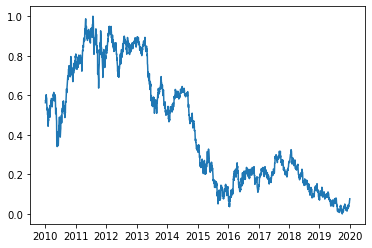

Australia


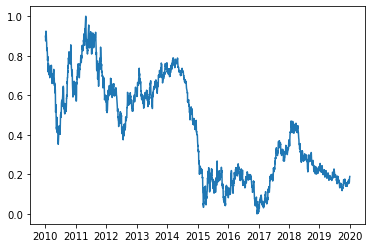

Europe


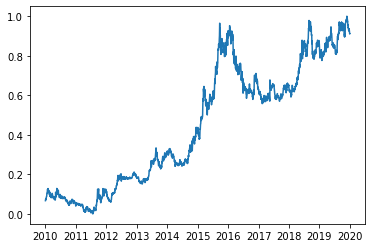

Brazil


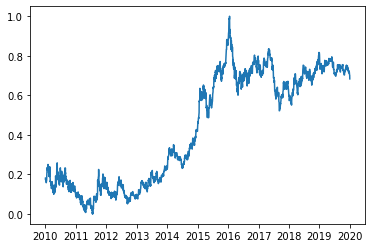

Canada


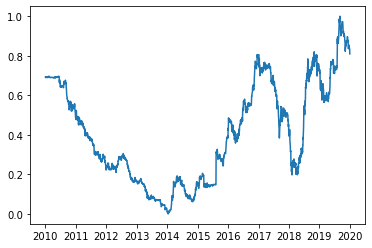

China


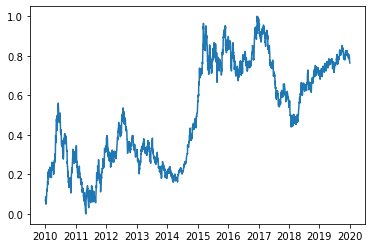

Denmark


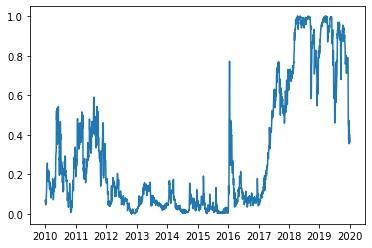

Hong Kong


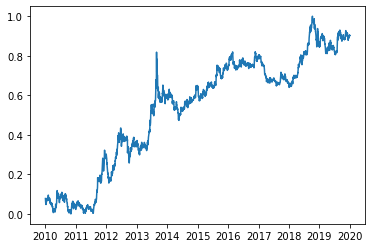

India


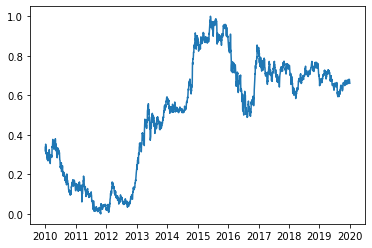

Japan


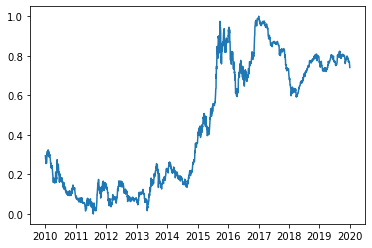

Malaysia


In [40]:
for i in d_norm.columns:
    plt.plot(d_norm[i])
    plt.show()
    print(i)

In [41]:
d_norm_week = pd.DataFrame([])
d_norm_month = pd.DataFrame([])
d_norm_quarter = pd.DataFrame([])
d_norm_sem = pd.DataFrame([])
d_norm_year = pd.DataFrame([])

In [ ]:
for i in d_norm.columns:
    d_norm_week[i] = 
    d_norm_month[i] = 
    d_norm_quarter[i] = 
    d_norm_sem[i] = 
    d_norm_year[i] = 

To do:
* Find the covariance between the rolling means and the normalized values
* tabulate
* Import the collected results from the json files
* tabulate
* Compare the covariances and the results and attempt to find correlations, and how the usage of the various networks